# Projeto Final Python: Clientes adimplentes e inadimplentes

O objetivo do projeto é explorar, transformar e visualizar os dados disponibilizados atraves do seguinte **[link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv)**. Dados em formato .CSV com informações de clientes de uma instituição financeira. O principal é explicar a segunda coluna "**default**" que indica se o cliente é adimplente ('0') ou inadimplente ('1') e o que faz isso acontecer de acordo com outros atributos, como salário, escolaridade e movimentação financeira.

# **Tópicos**

<ol type="1">
  <li>Importação das bibliotecas utilizadas;</li>
  <li>Exploração de dados;</li>
  <li>Transformação e limpeza de dados;</li>
  <li>Visualização de dados;</li>
  <li>Resumo;</li>
</ol>

## 1\. Importação bibliotecas utilizadas no projeto

In [1]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

## 2\. Exploração dos Dados

Descrição completa dos atributos:

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa salarial mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |

Leitura do arquivo

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

Exemplo para verificar se a leitura do arquivo esta correta ('5 linhas iniciais'):

In [3]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


### **2.1. Estrutura**


Resumo da coluna "**Default**" sem tratamento de dados:

In [4]:
df.shape
df[df['default'] == 0].shape
df[df['default'] == 1].shape
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape
print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


### **2.2. Schema**

 - Colunas e seus respectivos tipos de dados.

In [6]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

 - Atributos **categóricos**.

In [7]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


 - Atributos **numéricos**.

In [8]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### **2.3. Dados faltantes**

- Colunas que possuem dados faltantes.

In [9]:
na_true = df.isna().any()
na_true = na_true[na_true]  # Filtro para manter apenas os valores True
print(na_true)

escolaridade     True
estado_civil     True
salario_anual    True
dtype: bool


 - A função a seguir levanta algumas estatisticas sobre as colunas dos dados faltantes.

In [11]:
def stats_dados_faltantes(df: pd.DataFrame):

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

- Resumo geral após executar a função:

In [12]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


- Resumo clientes adimplentes.

In [13]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


- Resumo clientes inadimplentes.

In [14]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


## 3\. Transformação e limpeza de dados

Para transoformação e limpeza dos dados, vamos primeiro tratar os dados apresentados em um formato diferente do que deveria e em seguida remover os dados faltantes para serem melhores analisados.

### **3.1. Correção de schema**

Durante a exploração dos dados identificamos que a coluna **limite_credito** e **valor_transacoes_12m** foram interpretadas como colunas categóricas (`dtype = object`) uma string no caso. Isto ocorre porque a vírgula não é reconhecida como um separador decimal padrão. Em Python, o ponto (.) é usado como o separador decimal para números float.

In [15]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [16]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


- Função `lambda` para transformar as colunas **limite_credito** e **valor_transacoes_12m** para float.

In [17]:
if df['valor_transacoes_12m'].dtype == 'object':
    df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))

if df['limite_credito'].dtype == 'object':
    df['limite_credito'] = df['limite_credito'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))


- Descrever novamente o schema:


In [18]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

 - Atributos **categóricos**.

In [19]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


 - Atributos **numéricos**.

In [20]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


### **3.2. Remoção de dados faltantes**

- Remoção das linhas problemáticas.

In [21]:
df.dropna(inplace=True)

- Contagem geral de linhas e colunas após a remoção das linhas problemáticas.

In [22]:
df.shape

(7081, 16)

- Contagem linhas e colunas clientes adimplentes.

In [23]:
df[df['default'] == 0].shape

(5968, 16)

- Contagem linhas e colunas clientes inadimplentes

In [24]:
df[df['default'] == 1].shape

(1113, 16)

- Comparação resumida dos dados originais com os novos dados após o tratamento.

In [25]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


## 4\. Visualização de dados

Com os dados prontos, vamos criar diversas visualizações para correlacionar as variaveis e tentar entender qual fator leva um cliente a inadimplencia. Para isso vamos comparar todos os clientes ('adimplentes e inadimplentes').

In [26]:
sns.set_style("whitegrid")
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

### **4.1. Visualizações categóricas**

In [27]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


- **Escolaridade**

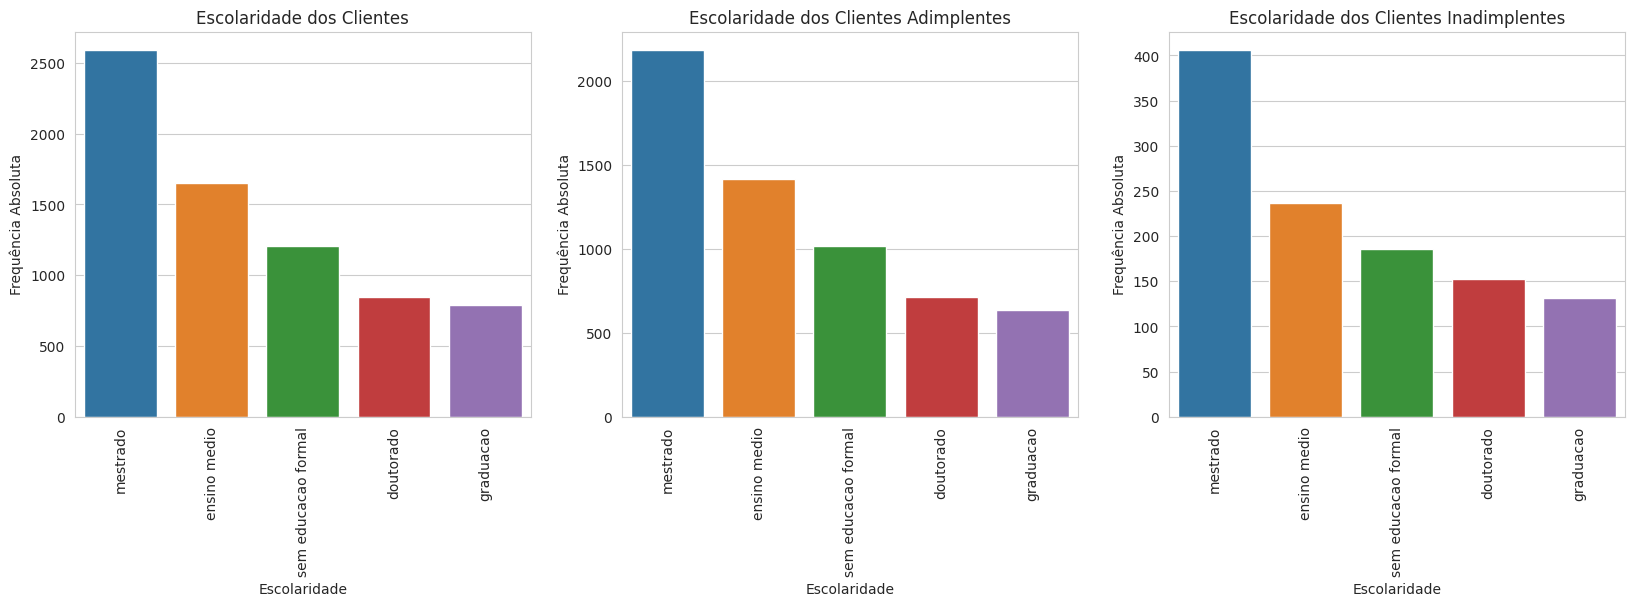

In [28]:
warnings.filterwarnings('ignore')

titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for i, default_value in enumerate([None, 0, 1]):
    if default_value is not None:
        df_filtered = df[df['default'] == default_value]
    else:
        df_filtered = df

    df_to_plot = df_filtered['escolaridade'].value_counts().reset_index()
    df_to_plot.columns = ['escolaridade', 'frequencia_absoluta']
    
    f = sns.barplot(x='escolaridade', y='frequencia_absoluta', data=df_to_plot, ax=eixos[i])
    f.set(title=titulos[i], xlabel='Escolaridade', ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

plt.show()

- **Salário Anual**

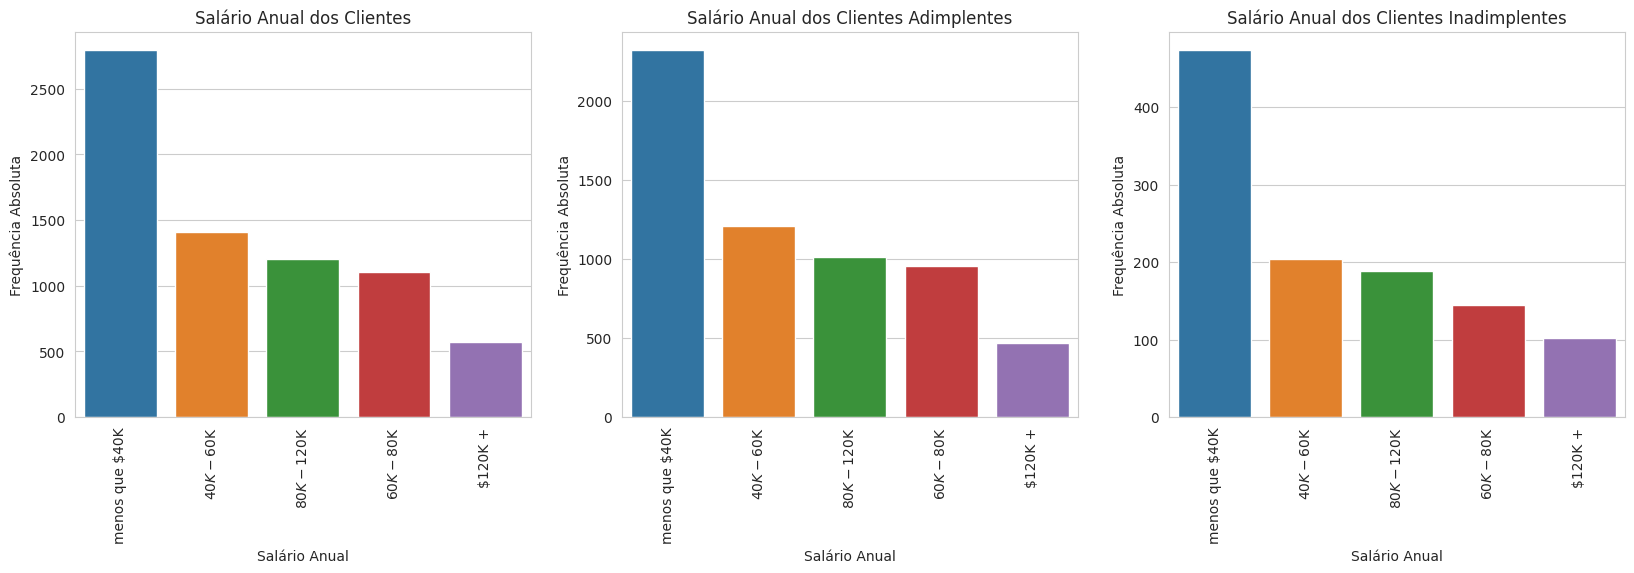

In [29]:
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

figura, eixos = plt.subplots(1, 3, figsize=(20, 5))

for i, default_value in enumerate([None, 0, 1]):
    if default_value is not None:
        df_filtered = df[df['default'] == default_value]
    else:
        df_filtered = df

    df_to_plot = df_filtered['salario_anual'].value_counts().reset_index()
    df_to_plot.columns = ['salario_anual', 'frequencia_absoluta']

    f = sns.barplot(x='salario_anual', y='frequencia_absoluta', data=df_to_plot, ax=eixos[i])
    f.set(title=titulos[i], xlabel='Salário Anual', ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

plt.show()

### **4.2. Visualizações numéricas**

- **Quantidade de Transações nos Últimos 12 Meses**

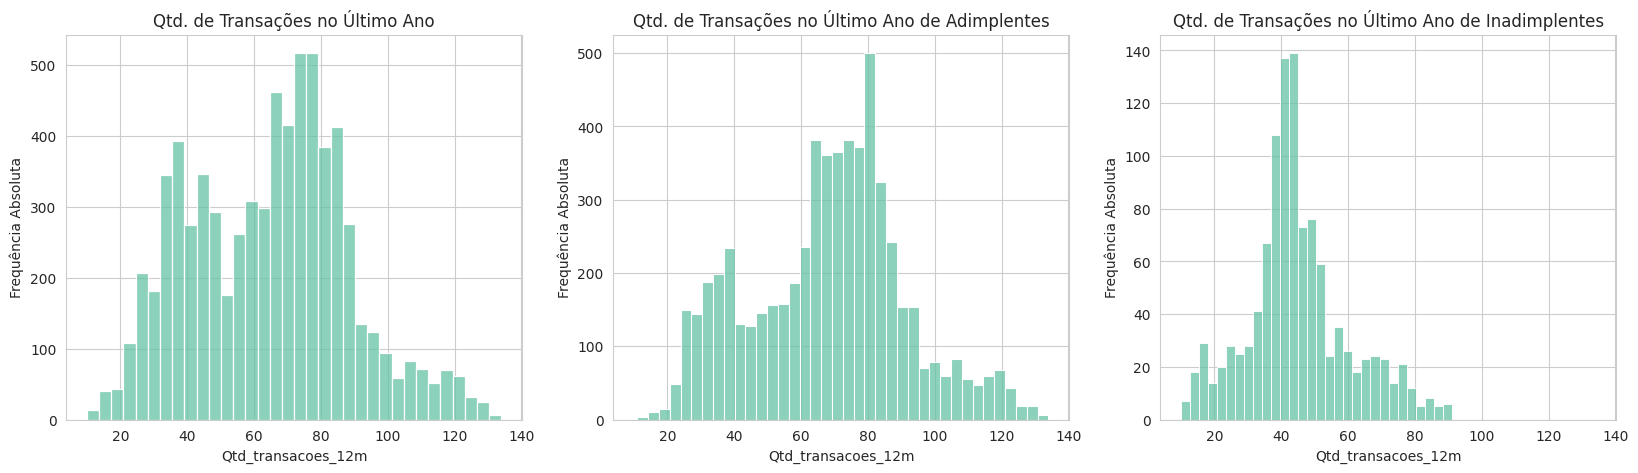

In [30]:
sns.set_palette("Set2")

coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for i, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[i])
    f.set(title=titulos[i], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    max_y_f = f.get_ylim()[1]
    f.set(ylim=(0, max_y_f))

plt.show()

- **Valor das Transações nos Últimos 12 Meses**

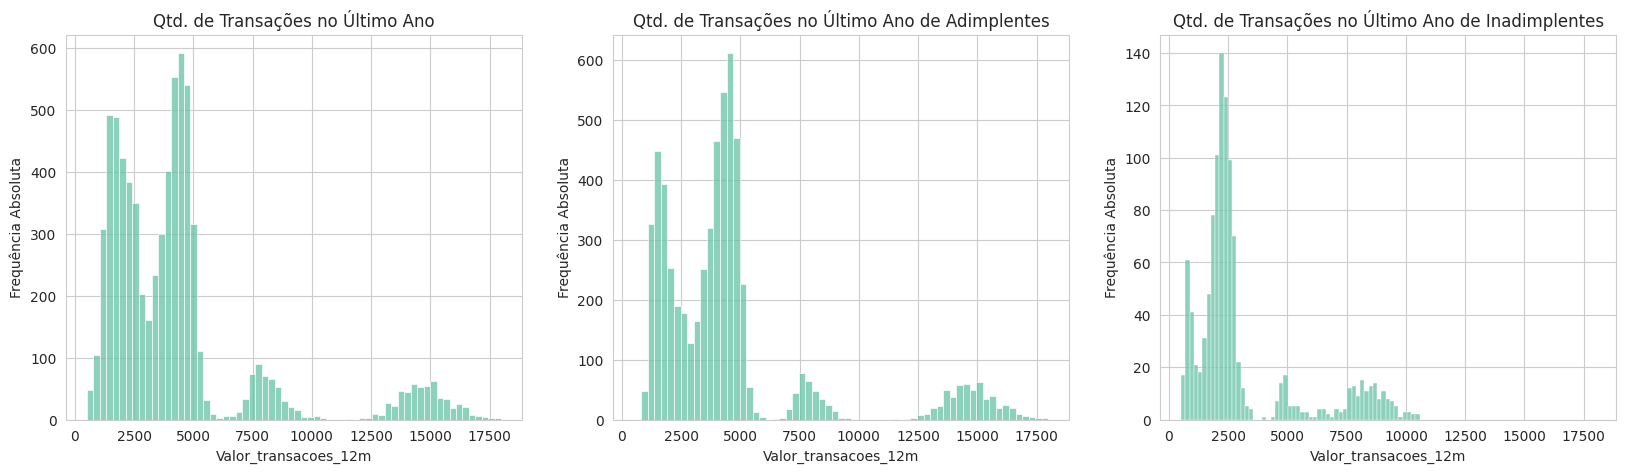

In [31]:
sns.set_palette("Set2")

coluna = 'valor_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for i, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[i])
    f.set(title=titulos[i], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    max_y_f = f.get_ylim()[1]
    f.set(ylim=(0, max_y_f))

plt.show()

- **Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses**

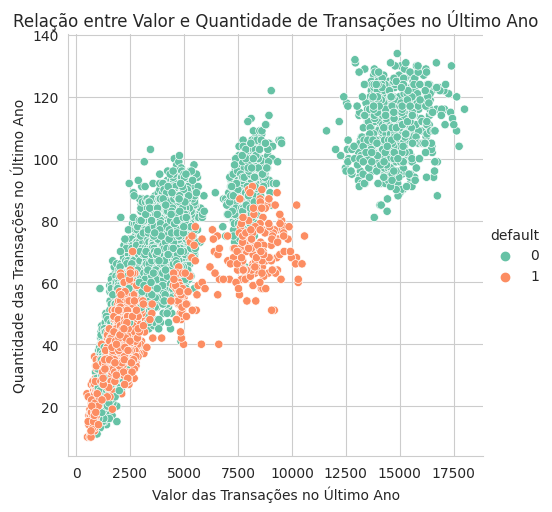

In [32]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )

## 5\. Resumo

Após analisar diversos graficos levando em consideração diversos atributos, a melhor visualização que demonstra melhor onde estão os clientes inadimplentes é o valor das transações dos ultimos 12 meses x quantidade de transações nos ultimos 12 meses. Neçe é possivel visualizar melhor onde está a maior quantidade de clientes inadimplentes na relação valor x quantidade das transações.